<center><font color="#e30b5d"><h1>Question 7</h1></font></center>

<center><font color="#0FF000"><h1>Part A</h2></font></center>

In [2]:
import  pandas                  as pd
import  numpy                   as np
import  matplotlib.pyplot       as plt
import  seaborn                 as sns

from    sklearn.svm             import SVC
from    sklearn.svm             import SVR
from    sklearn.datasets        import load_iris
from    sklearn.model_selection import train_test_split
from    sklearn.model_selection import GridSearchCV
from    sklearn.metrics         import accuracy_score
from    sklearn.metrics         import confusion_matrix
from    sklearn.metrics         import classification_report
from    sklearn.metrics         import ConfusionMatrixDisplay
from    sklearn.preprocessing   import StandardScaler
from    matplotlib.colors       import ListedColormap
from    matplotlib.pyplot       import pcolormesh

In [3]:
df = pd.read_csv('Q7-Part1.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df        = pd.read_csv('Q7-Part1.csv')
df.Salary = df.Salary.div(df.Salary.sum().astype(float))
df

,Position,Level,Salary
0,Business Analyst,1,0.018036
1,Junior Consultant,2,0.020040
2,Senior Consultant,3,0.024048
3,Manager,4,0.032064
4,Country Manager,5,0.044088
5,Region Manager,6,0.060120
6,Partner,7,0.080160
7,Senior Partner,8,0.120240
8,C-level,9,0.200401
9,CEO,10,0.400802


In [5]:
df = pd.read_csv('Q7-Part1.csv')

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df.Level, df.Salary, test_size = 0.3, random_state = 1)

Xtrain = sorted(Xtrain)
Xtest  = sorted(Xtest )
Ytrain = sorted(Ytrain)
Ytest  = sorted(Ytest )

<center><font color="#FFFF00"><h3>Linear</h3></font></center>

In [6]:
%%capture
SVR_model   = SVC(kernel = 'linear')
SVR_model.fit(np.array(Xtrain).reshape(-1, 1), np.array(Ytrain).reshape(-1, 1))
predic      = SVR_model.predict(np.array(Xtest).reshape(-1, 1))

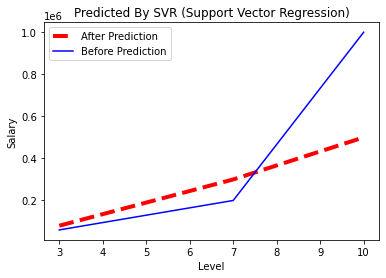

In [7]:
plt.plot(Xtest, predic, '--r', label = 'After Prediction', linewidth = 4)
plt.plot(Xtest, Ytest, '-b', label = 'Before Prediction')
plt.title('Predicted By SVR (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

<center><font color="#FFFF00"><h3>RBF</h3></font></center>

In [8]:
%%capture
SVR_model   = SVC(kernel = 'rbf')
SVR_model.fit(np.array(Xtrain).reshape(-1, 1), np.array(Ytrain).reshape(-1, 1))
predic      = SVR_model.predict(np.array(Xtest).reshape(-1, 1))

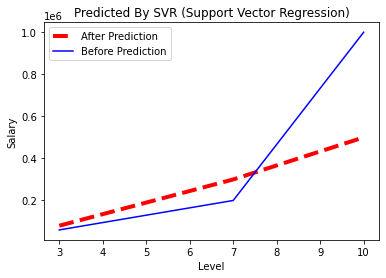

In [9]:
plt.plot(Xtest, predic, '--r', label = 'After Prediction', linewidth = 4)
plt.plot(Xtest, Ytest, '-b', label = 'Before Prediction')
plt.title('Predicted By SVR (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

<center><font color="#FFFF00"><h3>Polynomial</h3></font></center>

In [11]:
%%capture
SVR_model   = SVC(kernel = 'poly')
SVR_model.fit(np.array(Xtrain).reshape(-1, 1), np.array(Ytrain).reshape(-1, 1))
predic      = SVR_model.predict(np.array(Xtest).reshape(-1, 1))

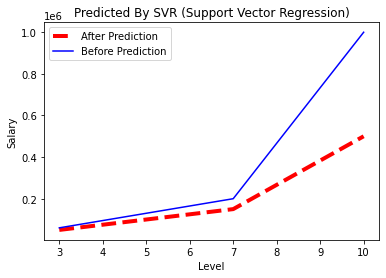

In [12]:
plt.plot(Xtest, predic, '--r', label = 'After Prediction', linewidth = 4)
plt.plot(Xtest, Ytest, '-b', label = 'Before Prediction')
plt.title('Predicted By SVR (Support Vector Regression)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

<center><font color="#0FF000"><h1>Part B</h2></font></center>

In [13]:
SC              = StandardScaler()

In [14]:
dftrain         = pd.read_csv('H1.csv')
dftest          = pd.read_csv('H2.csv')

Train_data      = dftrain.loc[:, (dftrain.columns != 'ADR') & (dftrain.columns != 'Country')]
Test_data       = dftest.loc[:, (dftest.columns != 'ADR') & (dftest.columns != 'Country')]

Train_Target    = dftrain.ADR.to_numpy()
Test_Target     = dftest.ADR.to_numpy()

Test_Mean       = Test_Target.mean()
Test_STD        = Test_Target.std()

In [15]:
SC.fit(Train_Target.reshape(-1, 1))
Train_Target = SC.transform(Train_Target.reshape(-1, 1))

SC.fit(Test_Target.reshape(-1, 1))
Test_Target = SC.transform(Test_Target.reshape(-1, 1))

In [16]:
%%capture
Train_data.ArrivalDateMonth     = Train_data.ArrivalDateMonth.apply(([  'April',
                                                                        'August',
                                                                        'December',
                                                                        'February',
                                                                        'January',
                                                                        'July',
                                                                        'June',
                                                                        'March',
                                                                        'May',
                                                                        'November',
                                                                        'October',
                                                                        'September']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.MarketSegment        = Train_data.MarketSegment.apply(([ 'Aviation',
                                                                    'Complementary',
                                                                    'Corporate',
                                                                    'Direct',
                                                                    'Groups',
                                                                    'Offline TA/TO',
                                                                    'Online TA',
                                                                    'Undefined']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.ReservedRoomType     = Train_data.ReservedRoomType.apply(([  'A               ',
                                                                        'B               ',
                                                                        'C               ',
                                                                        'D               ',
                                                                        'E               ',
                                                                        'F               ',
                                                                        'G               ',
                                                                        'H               ',
                                                                        'L               ',
                                                                        'P               ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.AssignedRoomType     = Train_data.AssignedRoomType.apply(([  'A               ',
                                                                        'B               ',
                                                                        'C               ',
                                                                        'D               ',
                                                                        'E               ',
                                                                        'F               ',
                                                                        'G               ',
                                                                        'H               ',
                                                                        'I               ',
                                                                        'L               ',
                                                                        'P               ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.Meal                 = Train_data.Meal.apply((['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.DepositType          = Train_data.DepositType.apply((['No Deposit     ', 'Non Refund     ', 'Refundable     ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.CustomerType         = Train_data.CustomerType.apply((['Contract', 'Group', 'Transient', 'Transient-Party']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.ReservationStatus    = Train_data.ReservationStatus.apply((['Canceled', 'Check-Out', 'No-Show']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Train_data.DistributionChannel  = Train_data.DistributionChannel.apply((['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']).index)

In [17]:
%%capture
Test_data.ArrivalDateMonth     = Test_data.ArrivalDateMonth.apply((['April',
                                                                    'August',
                                                                    'December',
                                                                    'February',
                                                                    'January',
                                                                    'July',
                                                                    'June',
                                                                    'March',
                                                                    'May',
                                                                    'November',
                                                                    'October',
                                                                    'September']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.MarketSegment        = Test_data.MarketSegment.apply((['Aviation',
                                                                'Complementary',
                                                                'Corporate',
                                                                'Direct',
                                                                'Groups',
                                                                'Offline TA/TO',
                                                                'Online TA',
                                                                'Undefined']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.ReservedRoomType     = Test_data.ReservedRoomType.apply((['A               ',
                                                                    'B               ',
                                                                    'C               ',
                                                                    'D               ',
                                                                    'E               ',
                                                                    'F               ',
                                                                    'G               ',
                                                                    'P               ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.AssignedRoomType     = Test_data.AssignedRoomType.apply((['A               ',
                                                                    'B               ',
                                                                    'C               ',
                                                                    'D               ',
                                                                    'E               ',
                                                                    'F               ',
                                                                    'G               ',
                                                                    'K               ',
                                                                    'P               ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.Meal                 = Test_data.Meal.apply((['BB       ', 'FB       ', 'HB       ', 'SC       ', 'Undefined']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.DepositType          = Test_data.DepositType.apply((['No Deposit     ', 'Non Refund     ', 'Refundable     ']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.CustomerType         = Test_data.CustomerType.apply((['Contract', 'Group', 'Transient', 'Transient-Party']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.ReservationStatus    = Test_data.ReservationStatus.apply((['Canceled', 'Check-Out', 'No-Show']).index)
#---------------------------------------------------------------------------------------------------------------------------------------------#
Test_data.DistributionChannel  = Test_data.DistributionChannel.apply((['Corporate', 'Direct', 'GDS', 'TA/TO', 'Undefined']).index)

In [18]:
model = SVR(kernel = 'poly', degree = 30)

In [19]:
%%capture
model.fit(Train_data, Train_Target)

In [20]:
Coeffs = pd.DataFrame(model.dual_coef_).T
Coeffs.to_csv('Coeffs.csv', index=False)

In [21]:
%%capture
Test_data.Children = Test_data.Children.fillna(0)

In [22]:
ypred = model.predict(Test_data)

In [23]:
Real        = (Test_Target.reshape(-1, 1) * Test_STD + Test_Mean).round(2)
Prediced    = (ypred.reshape(-1, 1) * Test_STD + Test_Mean).round(2)
df          = pd.DataFrame(np.c_[Real, Prediced, abs(Real - Prediced)], columns = ['Read', 'Predicted', 'Difference'])
df.head()

,Read,Predicted,Difference
0,-0.0,79.50,79.50
1,76.5,89.53,13.03
2,68.0,85.02,17.02
3,76.5,90.51,14.01
4,76.5,89.51,13.01


In [24]:
df.to_csv('Part_2.csv')